In [192]:
def unpack_list(lst):
    """
    Unpacks a list of lists into a single list.

    Parameters:
    lst (list): The input list of lists.

    Returns:
    list: The unpacked list.
    """
    return [elem for sublist in lst for elem in sublist]

In [246]:
import numpy as np

def normalize_by_min(arr):
    arr = np.array(arr)  # convert list to numpy array
    if arr.ndim == 0:
        return arr  # return the input scalar
    elif arr.ndim == 1:
        return [x / min(arr) for x in arr]  # normalize each element by the min value
    else:
        min_vals = np.apply_along_axis(np.min, 1, arr)
        normalized_arr = arr / min_vals[:, np.newaxis]
        return normalized_arr.tolist()


In [195]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def plot_and_print_linreg(nested_x, nested_y, nested_labels, xlabel, ylabel):
    colors = ['red', 'green', 'blue', 'orange'] # Add more colors as needed
    for i in range(len(nested_x)):
        x = np.array(nested_x[i])
        y = np.array(nested_y[i])
        label = nested_labels[i]

        # Reshape the X array into a 2D array with one column
        x = x.reshape(-1, 1)

        # Fit a linear regression model
        model = LinearRegression()
        model.fit(x, y)

        # Print the slope (coefficient) of the linear regression
        slope = model.coef_[0]
        print(f"The coefficient (slope) of the linear regression for {label} is {slope}")

        # Print whether the correlation is significant
        p_val = get_p_val(x, y)
        if p_val < 0.05:
            print(f"The correlation between {xlabel} and {ylabel} for {label} is significant (p = {p_val})")
        else:
            print(f"The correlation between {xlabel} and {ylabel} for {label} is not significant (p = {p_val})")

        # Plot the scatterplot and linear regression line
        plt.scatter(x, y, color=colors[i], label=label)
        plt.plot(x, model.predict(x), color=colors[i])

    # Add labels to the plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("Scatterplot with Linear Regression")
    plt.legend()

    # Show the plot
    plt.show()

def get_p_val(x, y):
    from scipy.stats import pearsonr
    corr, p_val = pearsonr(x.flatten(), y.flatten())
    return p_val


The coefficient (slope) of the linear regression for 4 is -0.0014137913385522045
The correlation between COM_inside and speed for 4 is not significant (p = 0.21817135349106778)
The coefficient (slope) of the linear regression for 5 is 0.008142593301351437
The correlation between COM_inside and speed for 5 is significant (p = 0.04904314327825885)
The coefficient (slope) of the linear regression for 8 is -0.007760599875557358
The correlation between COM_inside and speed for 8 is not significant (p = 0.85908842716697)
The coefficient (slope) of the linear regression for 10 is 0.0
The correlation between COM_inside and speed for 10 is not significant (p = nan)


C:\Users\Salvo\anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


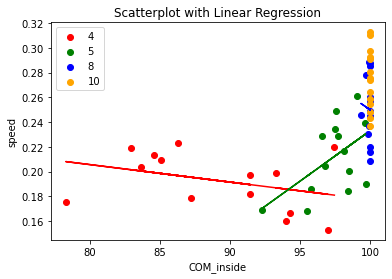

The coefficient (slope) of the linear regression for 4 is -0.005961962801355599
The correlation between COM_inside and speed for 4 is not significant (p = 0.10169787040295632)


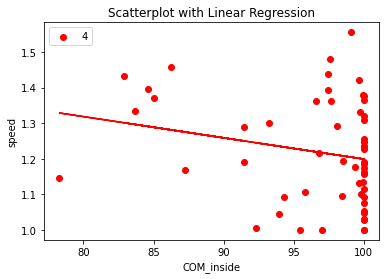

In [218]:
speed = [[0.21968, 0.198874, 0.159871, 0.166849, 0.152806, 0.213397, 0.22297, 0.182022, 0.175179, 0.197024, 0.203727, 0.178599, 0.209633, 0.219108],
         [0.228834, 0.234354, 0.169105, 0.186258, 0.168086, 0.261432, 0.248756, 0.190303, 0.184278, 0.200478, 0.23889, 0.217029, 0.204626, 0.229062],
         [0.248694, 0.260598, 0.21548, 0.220114, 0.208814, 0.278151, 0.287572, 0.257415, 0.288268, 0.237109, 0.285354, 0.246013, 0.244962, 0.230069],
         [0.264003, 0.280835, 0.247765, 0.273795, 0.236714, 0.310016, 0.312474, 0.243205, 0.29235, 0.254615, 0.275495, 0.258617, 0.29075, 0.297355]]
COM_inside = [[97.4471,93.2667,93.9667,94.3077,96.9867,84.5778,86.2667,91.4609,78.287,91.4444,83.6727,87.2118,85.07,82.9222],
              [97.6833, 97.4609, 92.2947, 95.7846, 95.4815, 99.0545, 97.5647, 99.6824, 98.45, 98.4833, 99.6667, 98.1241, 96.8, 96.563],
              [100, 100, 100, 100, 100, 99.7294, 100, 100, 99.9091, 99.9474, 100, 99.35, 100, 99.8133],
              [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]]

plot_and_print_linreg(COM_inside, speed, labels, 'COM_inside', 'speed')
plot_and_print_linreg([unpack_list(COM_inside)], [unpack_list(normalize_by_min(speed))], labels, 'COM_inside', 'speed')

In [220]:
speed = [[0.21968, 0.198874, 0.159871, 0.166849, 0.152806, 0.213397, 0.22297, 0.182022, 0.175179, 0.197024, 0.193332, 0.203727, 0.178599, 0.209633, 0.219108],
         [0.228834, 0.234354, 0.169105, 0.186258, 0.168086, 0.261432, 0.248756, 0.190303, 0.184278, 0.200478, 0.210666, 0.23889, 0.217029, 0.204626, 0.229062],
         [0.248694, 0.260598, 0.21548, 0.220114, 0.208814, 0.278151, 0.287572, 0.257415, 0.288268, 0.237109, 0.207949, 0.285354, 0.246013, 0.244962, 0.230069],
         [0.264003, 0.280835, 0.247765, 0.273795, 0.236714, 0.310016, 0.312474, 0.243205, 0.29235, 0.254615, 0.234833, 0.275495, 0.258617, 0.29075, 0.297355]]
COM_inside = [[97.4471,93.2667,93.9667,94.3077,96.9867,84.5778,86.2667,91.4609,78.287,91.4444,83.6727,87.2118,85.07,82.9222],
              [97.6833, 97.4609, 92.2947, 95.7846, 95.4815, 99.0545, 97.5647, 99.6824, 98.45, 98.4833, 99.6667, 98.1241, 96.8, 96.563],
              [100, 100, 100, 100, 100, 99.7294, 100, 100, 99.9091, 99.9474, 100, 99.35, 100, 99.8133],
              [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]]
COM_inside_with_outlier = [[97.4471,93.2667,93.9667,94.3077,96.9867,84.5778,86.2667,91.4609,78.287,91.4444,41.3579,83.6727,87.2118,85.07,82.9222],
              [97.6833, 97.4609, 92.2947, 95.7846, 95.4815, 99.0545, 97.5647, 99.6824, 98.45, 98.4833, 97.1368, 99.6667, 98.1241, 96.8, 96.563],
              [100, 100, 100, 100, 100, 99.7294, 100, 100, 99.9091, 99.9474, 100, 100, 99.35, 100, 99.8133],
              [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]]
COM_dist_edge = [[0.624792,0.466703,0.583221,0.579171,0.484675,0.363611,0.392991,0.50235,0.30805,0.475645,0.29542,0.401239,0.396708,0.413811,0.365849],
              [0.668, 0.693341, 0.581097, 0.637176, 0.627893, 0.653926, 0.65101, 0.670656, 0.697036, 0.661927, 0.596836, 0.725508, 0.686121, 0.666481, 0.65393],
              [0.826746, 0.833863, 0.780181, 0.849648, 0.838273, 0.735282, 0.775385, 0.806379, 0.732871, 0.7376, 0.756369, 0.713636, 0.682644, 0.69455, 0.706332],
              [0.836214, 0.811143, 0.800849, 0.832492, 0.816306, 0.818216, 0.799179, 0.775129, 0.811889, 0.745691, 0.705513, 0.651262, 0.625316, 0.730359, 0.658068]]
back_axis = [[6.421962,5.567339,5.894979,9.069493,6.380302,5.858866,5.730914,15.36558,7.231822,11.87404,12.21597,8.929757,11.72343,14.5949,5.995917],
              [5.822254, 7.036027, 7.472614, 6.669383, 7.357641, 8.812982, 6.247337, 11.66709, 9.581535, 10.6718, 9.405176, 6.234231, 10.82055, 10.64651, 5.466323],
              [4.961811, 5.789241, 6.119904, 4.152315, 3.609571, 7.333897, 7.698764, 6.828593, 8.430406, 7.908733, 8.629586, 6.457031, 8.607266, 7.843934, 7.358269],
              [4.222583, 6.031597, 6.510345, 4.781579, 4.275118, 7.043264, 6.347029, 7.389853, 6.7446, 7.712789, 6.395588, 5.164623, 6.226438, 7.051317, 8.15884]]
tail_axis = [[49.69356, 40.56499, 41.56802, 48.00282, 38.55996, 40.43285, 47.44803, 46.44677, 32.53568, 48.30873, 39.56387, 54.41268, 40.40329, 45.98213, 37.40849],
              [36.78267, 39.42015, 37.19939, 40.51457, 35.70235, 44.8707, 52.38286, 44.02084, 36.38639, 41.63677, 38.25078, 50.08183, 38.03615, 47.74302, 35.97731],
              [29.2887, 34.28441, 31.89745, 30.93124, 19.48806, 38.20817, 45.11284, 30.65732, 36.52107, 41.36395, 35.57618, 47.00322, 33.16066, 40.75971, 42.25933],
              [25.18638, 33.2407, 36.06089, 29.12362, 19.57962, 39.86479, 41.7585, 27.82121, 36.33128, 32.29627, 28.04766, 35.65942, 31.19024, 39.77669, 40.1696]]

In [225]:
tail_mean_side = [[123.5384, 129.2677, 106.2848, 110.6238, 128.6059, 89.31659, 152.2517, 76.90253, 76.78829, 89.51649, 36.54673, 111.6269, 88.96962, 64.98836, 103.5449],
               [138.1095, 119.8027, 84.08635, 112.7595, 92.94477, 90.48943, 140.6579, 104.2819, 67.43388, 101.4972, 55.22297, 139.465, 92.42774, 97.6296, 105.997],
               [156.5966, 125.6977, 107.2183, 157.7077, 130.1397, 103.0586, 129.5561, 106.5401, 124.4667, 115.2412, 67.80727, 136.1341, 128.6216, 134.7669, 107.4644],
               [154.6732, 133.4284, 114.9997, 156.8066, 132.3407, 113.4382, 158.3977, 133.6406, 141.2596, 114.4987, 109.1348, 146.3128, 135.8779, 142.5022, 118.3888]]
tail_disp_side = [[35.61257, 34.86959, 37.70405, 32.86737, 33.93442, 35.11956, 30.74609, 27.68918, 44.72402, 27.25057, 23.53389, 33.30458, 42.04616, 36.18129, 48.22614],
               [31.8639, 34.65825, 36.77392, 30.24034, 34.55128, 34.68826, 36.15038, 25.51727, 39.0707, 29.03871, 25.25699, 32.48848, 41.30476, 46.44136, 32.03989],
               [22.86067, 28.19643, 34.04745, 18.5096, 29.15532, 31.67978, 30.99305, 27.97879, 32.93253, 24.86568, 21.76554, 20.15272, 26.73749, 33.86175, 20.73929],
               [21.07915, 26.64291, 33.92834, 20.01633, 24.13763, 22.24146, 25.08681, 21.78424, 26.84716, 18.92099, 28.47737, 20.42901, 25.58442, 30.69942, 19.14346]]


The coefficient (slope) of the linear regression for 4 is -0.06143167007549417
The correlation between COM_dist_edge and speed for 4 is not significant (p = 0.33283446474308537)
The coefficient (slope) of the linear regression for 5 is 0.3152517982982932
The correlation between COM_dist_edge and speed for 5 is not significant (p = 0.12753928977894397)
The coefficient (slope) of the linear regression for 8 is -0.13844076212168877
The correlation between COM_dist_edge and speed for 8 is not significant (p = 0.3232698701548953)
The coefficient (slope) of the linear regression for 10 is 0.027977308390508434
The correlation between COM_dist_edge and speed for 10 is not significant (p = 0.7831056655823352)


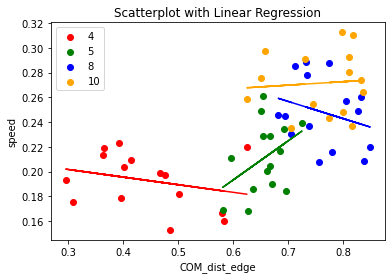

The coefficient (slope) of the linear regression for 4 is -0.24742320293314604
The correlation between COM_dist_edge and speed for 4 is not significant (p = 0.053559431050756404)


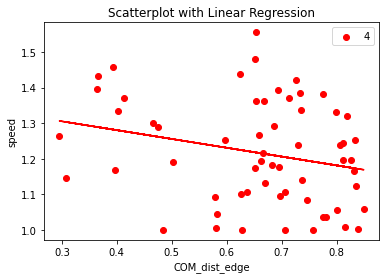

In [221]:
plot_and_print_linreg(COM_dist_edge, speed, labels, 'COM_dist_edge', 'speed')
plot_and_print_linreg([unpack_list(COM_dist_edge)], [unpack_list(normalize_by_min(speed))], labels, 'COM_dist_edge', 'speed')

The coefficient (slope) of the linear regression for 4 is -0.0005811842128368637
The correlation between back_axis and speed for 4 is not significant (p = 0.754939801014899)
The coefficient (slope) of the linear regression for 5 is -0.0040960823039257405
The correlation between back_axis and speed for 5 is not significant (p = 0.2820081254696046)
The coefficient (slope) of the linear regression for 8 is 0.005959668703359655
The correlation between back_axis and speed for 8 is not significant (p = 0.2231172301500535)
The coefficient (slope) of the linear regression for 10 is 0.005755868135223634
The correlation between back_axis and speed for 10 is not significant (p = 0.33162013476219626)


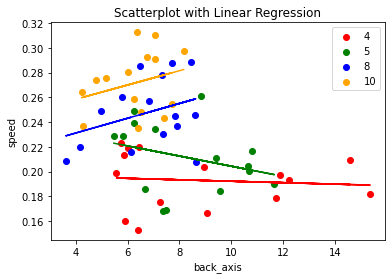

The coefficient (slope) of the linear regression for 4 is 0.006288013675199184
The correlation between back_axis and speed for 4 is not significant (p = 0.4271774093539622)


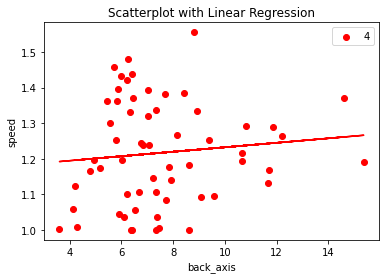

In [222]:
plot_and_print_linreg(back_axis, speed, labels, 'back_axis', 'speed')
plot_and_print_linreg([unpack_list(back_axis)], [unpack_list(normalize_by_min(speed))], labels, 'back_axis', 'speed')

The coefficient (slope) of the linear regression for 4 is 0.001247242498699076
The correlation between tail_axis and speed for 4 is not significant (p = 0.25226992652314173)
The coefficient (slope) of the linear regression for 5 is 0.002620771153076582
The correlation between tail_axis and speed for 5 is not significant (p = 0.06153742249101206)
The coefficient (slope) of the linear regression for 8 is 0.00220476159753627
The correlation between tail_axis and speed for 8 is significant (p = 0.033034276104445225)
The coefficient (slope) of the linear regression for 10 is 0.0032654611251632013
The correlation between tail_axis and speed for 10 is significant (p = 0.0002770028030584728)


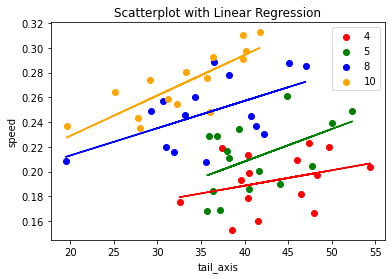

The coefficient (slope) of the linear regression for 4 is 0.008162261290126538
The correlation between tail_axis and speed for 4 is not significant (p = 0.25226992652314173)
The coefficient (slope) of the linear regression for 5 is 0.015591846751523511
The correlation between tail_axis and speed for 5 is not significant (p = 0.061537422491012087)
The coefficient (slope) of the linear regression for 8 is 0.010602415003372322
The correlation between tail_axis and speed for 8 is significant (p = 0.03303427610444522)
The coefficient (slope) of the linear regression for 10 is 0.0139054610091563
The correlation between tail_axis and speed for 10 is significant (p = 0.00027700280305847176)


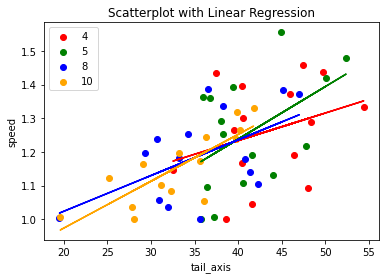

The coefficient (slope) of the linear regression for 4 is 0.011509105958029573
The correlation between tail_axis and speed for 4 is significant (p = 1.4611491137041318e-06)


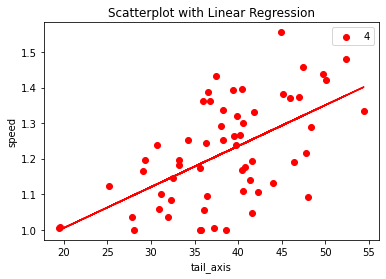

In [223]:
plot_and_print_linreg(tail_axis, speed, labels, 'tail_axis', 'speed')
plot_and_print_linreg(tail_axis, normalize_by_min(speed), labels, 'tail_axis', 'speed')
plot_and_print_linreg([unpack_list(tail_axis)], [unpack_list(normalize_by_min(speed))], labels, 'tail_axis', 'speed')

The coefficient (slope) of the linear regression for 4 is 7.620782420965247e-05
The correlation between tail_axis and speed for 4 is not significant (p = 0.7279463174895555)
The coefficient (slope) of the linear regression for 5 is 0.000552233234505501
The correlation between tail_axis and speed for 5 is not significant (p = 0.07004454461490539)
The coefficient (slope) of the linear regression for 8 is 0.00027009704212355834
The correlation between tail_axis and speed for 8 is not significant (p = 0.4430456873673104)
The coefficient (slope) of the linear regression for 10 is 0.0004664028568403746
The correlation between tail_axis and speed for 10 is not significant (p = 0.27356568498250866)


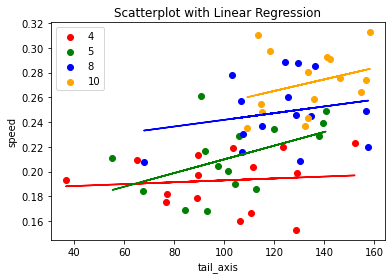

The coefficient (slope) of the linear regression for 4 is 0.0004987227216840469
The correlation between tail_axis and speed for 4 is not significant (p = 0.7279463174895547)
The coefficient (slope) of the linear regression for 5 is 0.003285420763808412
The correlation between tail_axis and speed for 5 is not significant (p = 0.0700445446149054)
The coefficient (slope) of the linear regression for 8 is 0.0012988619427049821
The correlation between tail_axis and speed for 8 is not significant (p = 0.44304568736731026)
The coefficient (slope) of the linear regression for 10 is 0.00198610440968848
The correlation between tail_axis and speed for 10 is not significant (p = 0.2735656849825086)


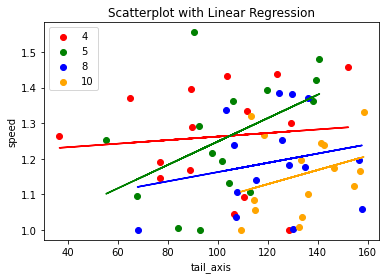

The coefficient (slope) of the linear regression for 4 is 0.00030626255331027907
The correlation between tail_axis and speed for 4 is not significant (p = 0.6661892955662836)


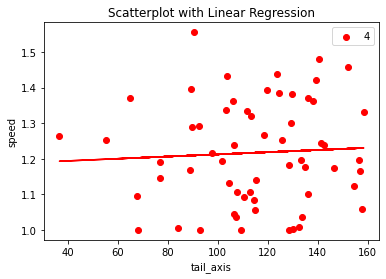

In [233]:
plot_and_print_linreg(tail_mean_side, speed, labels, 'tail_axis', 'speed')
plot_and_print_linreg(tail_mean_side, normalize_by_min(speed), labels, 'tail_axis', 'speed')
plot_and_print_linreg([unpack_list(tail_mean_side)], [unpack_list(normalize_by_min(speed))], labels, 'tail_axis', 'speed')

The coefficient (slope) of the linear regression for 4 is 2.7785054595455275e-05
The correlation between tail_axis and speed for 4 is not significant (p = 0.97735944149918)
The coefficient (slope) of the linear regression for 5 is 6.436728469060668e-05
The correlation between tail_axis and speed for 5 is not significant (p = 0.9642257458703645)
The coefficient (slope) of the linear regression for 8 is 0.001435634510305658
The correlation between tail_axis and speed for 8 is not significant (p = 0.3374323575841384)
The coefficient (slope) of the linear regression for 10 is -0.0007775573143178165
The correlation between tail_axis and speed for 10 is not significant (p = 0.6322322481953498)


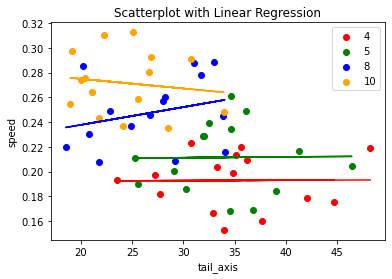

The coefficient (slope) of the linear regression for 4 is 0.00018183222252696305
The correlation between tail_axis and speed for 4 is not significant (p = 0.9773594414991799)
The coefficient (slope) of the linear regression for 5 is 0.00038294256922412464
The correlation between tail_axis and speed for 5 is not significant (p = 0.9642257458703645)
The coefficient (slope) of the linear regression for 8 is 0.006903781746032248
The correlation between tail_axis and speed for 8 is not significant (p = 0.33743235758413814)
The coefficient (slope) of the linear regression for 10 is -0.003311107528830338
The correlation between tail_axis and speed for 10 is not significant (p = 0.632232248195351)


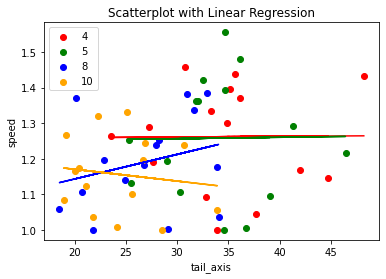

The coefficient (slope) of the linear regression for 4 is 0.00030626255331027907
The correlation between tail_axis and speed for 4 is not significant (p = 0.6661892955662836)


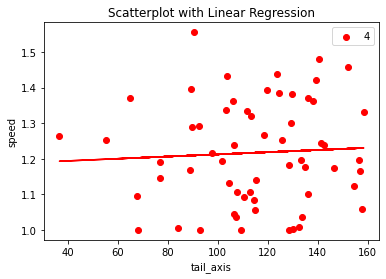

In [234]:
plot_and_print_linreg(tail_disp_side, speed, labels, 'tail_axis', 'speed')
plot_and_print_linreg(tail_disp_side, normalize_by_min(speed), labels, 'tail_axis', 'speed')
plot_and_print_linreg([unpack_list(tail_mean_side)], [unpack_list(normalize_by_min(speed))], labels, 'tail_axis', 'speed')

The coefficient (slope) of the linear regression for 4 is -0.08147789440348446
The correlation between tail_mean_side and back_axis for 4 is significant (p = 0.004243714906851001)
The coefficient (slope) of the linear regression for 5 is -0.04651992804833636
The correlation between tail_mean_side and back_axis for 5 is significant (p = 0.030843381659559632)
The coefficient (slope) of the linear regression for 8 is -0.03865721748244303
The correlation between tail_mean_side and back_axis for 8 is significant (p = 0.034967573351401264)
The coefficient (slope) of the linear regression for 10 is -0.040551982330055025
The correlation between tail_mean_side and back_axis for 10 is significant (p = 0.029389607301300507)


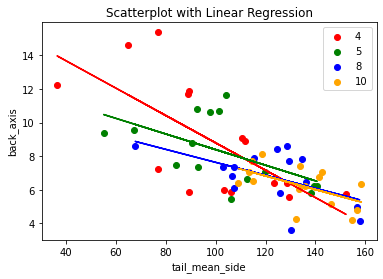

The coefficient (slope) of the linear regression for 4 is -0.014634979907543704
The correlation between tail_mean_side and back_axis for 4 is significant (p = 0.004243714906851001)
The coefficient (slope) of the linear regression for 5 is -0.008510277941558954
The correlation between tail_mean_side and back_axis for 5 is significant (p = 0.030843381659559608)
The coefficient (slope) of the linear regression for 8 is -0.01070964319096176
The correlation between tail_mean_side and back_axis for 8 is significant (p = 0.03496757335140126)
The coefficient (slope) of the linear regression for 10 is -0.009603596265616337
The correlation between tail_mean_side and back_axis for 10 is significant (p = 0.029389607301300535)


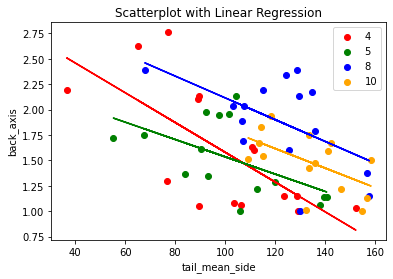

The coefficient (slope) of the linear regression for 4 is -0.007937216373745318
The correlation between tail_mean_side and back_axis for 4 is significant (p = 0.00018168795014676008)


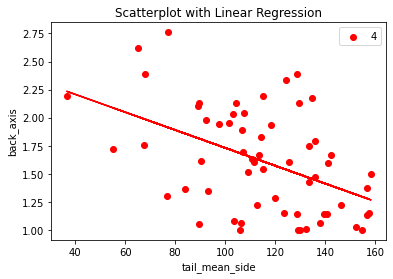

In [238]:
plot_and_print_linreg(tail_mean_side, back_axis, labels, 'tail_mean_side', 'back_axis')
plot_and_print_linreg(tail_mean_side, normalize_by_min(back_axis), labels, 'tail_mean_side', 'back_axis')
plot_and_print_linreg([unpack_list(tail_mean_side)], [unpack_list(normalize_by_min(back_axis))], labels, 'tail_mean_side', 'back_axis')

The coefficient (slope) of the linear regression for 4 is 126.30991761557698
The correlation between speed and tail_mean_side for 4 is not significant (p = 0.7279463174895555)
The coefficient (slope) of the linear regression for 5 is 417.54494403757406
The correlation between speed and tail_mean_side for 5 is not significant (p = 0.07004454461490539)
The coefficient (slope) of the linear regression for 8 is 170.076288420322
The correlation between speed and tail_mean_side for 8 is not significant (p = 0.4430456873673104)
The coefficient (slope) of the linear regression for 10 is 195.861182218706
The correlation between speed and tail_mean_side for 10 is not significant (p = 0.27356568498250866)


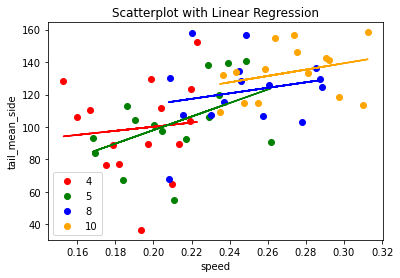

The coefficient (slope) of the linear regression for 4 is 3.4561209064552973
The correlation between speed and tail_mean_side for 4 is not significant (p = 0.7279463174895555)
The coefficient (slope) of the linear regression for 5 is 7.561073662600436
The correlation between speed and tail_mean_side for 5 is not significant (p = 0.07004454461490539)
The coefficient (slope) of the linear regression for 8 is 2.5082308787881016
The correlation between speed and tail_mean_side for 8 is not significant (p = 0.4430456873673104)
The coefficient (slope) of the linear regression for 10 is 1.794672113924303
The correlation between speed and tail_mean_side for 10 is not significant (p = 0.27356568498250866)


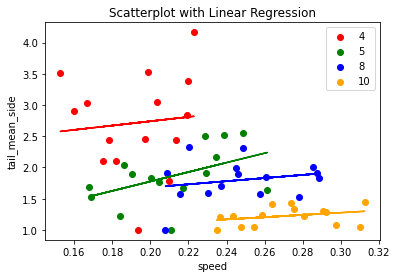

The coefficient (slope) of the linear regression for 4 is 368.10258974653163
The correlation between speed and tail_mean_side for 4 is significant (p = 6.504305090251092e-06)


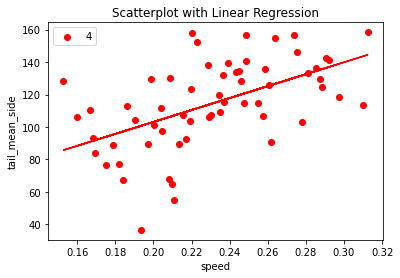

In [255]:
plot_and_print_linreg(speed, tail_mean_side, labels, 'speed', 'tail_mean_side')
plot_and_print_linreg(speed, normalize_by_min(tail_mean_side), labels, 'speed', 'tail_mean_side')
plot_and_print_linreg([unpack_list(speed)], [unpack_list((tail_mean_side))], labels, 'speed', 'tail_mean_side')

In [263]:
labels

['4', '5', '8', '10']